In [2]:
import pandas as pd
from datetime import timedelta
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
!pip install openpyxl


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 244 kB 15 kB/s eta 0:00:01


In [6]:
data = pd.read_excel('../../data/market_data.xlsx')

In [7]:
data.head()

,Time (UTC+10),Regions NSW Trading Price ($/MWh),Regions SA Trading Price ($/MWh),Regions TAS Trading Price ($/MWh),Regions VIC Trading Price ($/MWh),Regions NSW Trading Total Intermittent Generation (MW),Regions SA Trading Total Intermittent Generation (MW),Regions TAS Trading Total Intermittent Generation (MW),Regions VIC Trading Total Intermittent Generation (MW),Regions NSW Operational Demand (MW),Regions SA Operational Demand (MW),Regions TAS Operational Demand (MW),Regions VIC Operational Demand (MW)
0,2018-01-01 00:00:00,88.00,103.11,90.55,90.43,0.18,60.53,121.68,146.87,7100,1398,1091,4599
1,2018-01-01 00:30:00,91.86,107.17,92.28,92.46,0.15,43.07,118.73,131.68,6974,1359,1082,4398
2,2018-01-01 01:00:00,88.83,103.31,87.53,87.62,0.13,41.67,110.48,119.98,6790,1316,1071,4238
3,2018-01-01 01:30:00,73.62,88.20,76.29,73.08,0.14,42.15,120.09,123.86,6536,1240,1067,4112
4,2018-01-01 02:00:00,71.49,85.24,75.10,70.18,0.16,38.31,114.64,132.72,6339,1194,1061,3956


In [8]:
victoria_data=data[['Time (UTC+10)', 'Regions VIC Trading Price ($/MWh)', 
                 'Regions VIC Trading Total Intermittent Generation (MW)', 
                 'Regions VIC Operational Demand (MW)']]


In [9]:
victoria_data.dtypes

Time (UTC+10)                                             datetime64[ns]
Regions VIC Trading Price ($/MWh)                                float64
Regions VIC Trading Total Intermittent Generation (MW)           float64
Regions VIC Operational Demand (MW)                                int64
dtype: object

In [10]:
#Check the null
victoria_data.isnull().values.any()

False

In [11]:
victoria_data. describe() 

,Regions VIC Trading Price ($/MWh),Regions VIC Trading Total Intermittent Generation (MW),Regions VIC Operational Demand (MW)
count,63457.000000,63457.000000,63457.000000
mean,78.746880,169.029236,5083.026018
std,289.259796,114.763946,862.678623
min,-676.370000,-0.860000,2529.000000
25%,39.010000,70.080000,4438.000000
50%,64.110000,152.060000,4972.000000
75%,94.850000,257.320000,5585.000000
max,14700.000000,467.480000,9667.000000


<AxesSubplot:>

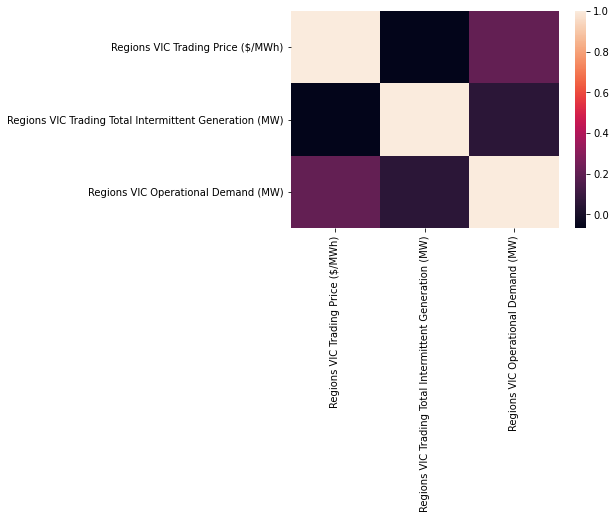

In [13]:
vd_correlation=victoria_data.corr()
sns.heatmap(vd_correlation)

/home/ruiwang/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


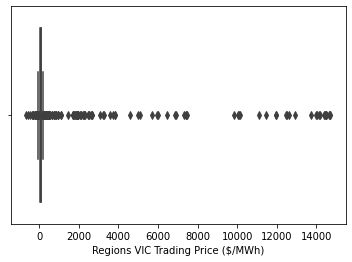

In [21]:
sns.boxplot(victoria_data["Regions VIC Trading Price ($/MWh)"])
plt.show()

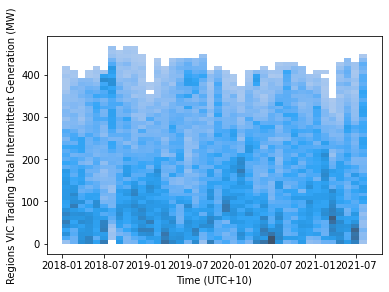

In [26]:
sns.histplot(x=victoria_data['Time (UTC+10)'],y=victoria_data["Regions VIC Trading Total Intermittent Generation (MW)"])
plt.show()

<AxesSubplot:xlabel='Time (UTC+10)', ylabel='Regions VIC Operational Demand (MW)'>

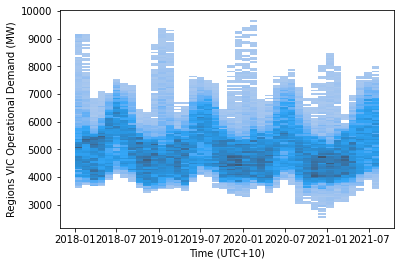

In [27]:
sns.histplot(x=victoria_data['Time (UTC+10)'],y=victoria_data["Regions VIC Operational Demand (MW)"])
plt.show()

In [42]:
victoria_data["month"]=victoria_data['Time (UTC+10)'].dt.month
victoria_data["day"]=victoria_data['Time (UTC+10)'].dt.dayofweek+1
victoria_data["hour"]=victoria_data['Time (UTC+10)'].dt.hour

/tmp/ipykernel_875/163448493.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victoria_data["month"]=victoria_data['Time (UTC+10)'].dt.month
/tmp/ipykernel_875/163448493.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  victoria_data["day"]=victoria_data['Time (UTC+10)'].dt.dayofweek+1
/tmp/ipykernel_875/163448493.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [39]:
victoria_data["day"]

0        1
1        1
2        1
3        1
4        1
        ..
63452    6
63453    6
63454    6
63455    6
63456    7
Name: day, Length: 63457, dtype: int64

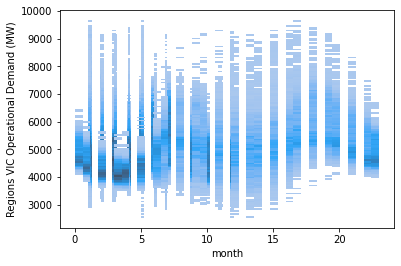

In [44]:
sns.histplot(x=victoria_data['month'],y=victoria_data["Regions VIC Operational Demand (MW)"])
plt.show()

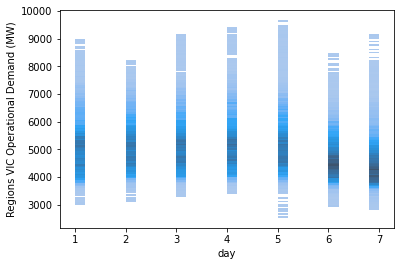

In [40]:
sns.histplot(x=victoria_data['day'],y=victoria_data["Regions VIC Operational Demand (MW)"])
plt.show()

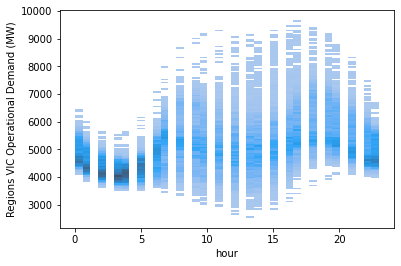

In [43]:
sns.histplot(x=victoria_data['hour'],y=victoria_data["Regions VIC Operational Demand (MW)"])
plt.show()

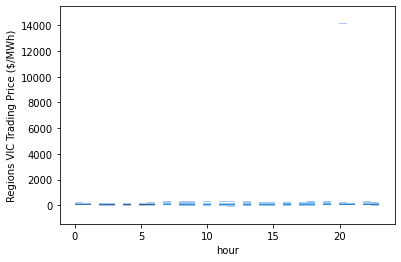

In [61]:
#outlier
sns.histplot(x=victoria_data['hour'],y=victoria_data['Regions VIC Trading Price ($/MWh)'])
plt.show()

In [59]:
victoria_price= victoria_data.loc[(victoria_data['Regions VIC Trading Price ($/MWh)'] >= 0) &
                            (victoria_data['Regions VIC Trading Price ($/MWh)'] <=1000)]
victoria_price

,Time (UTC+10),Regions VIC Trading Price ($/MWh),Regions VIC Trading Total Intermittent Generation (MW),Regions VIC Operational Demand (MW),month,day,hour
0,2018-01-01 00:00:00,90.43,146.87,4599,1,1,0
1,2018-01-01 00:30:00,92.46,131.68,4398,1,1,0
2,2018-01-01 01:00:00,87.62,119.98,4238,1,1,1
3,2018-01-01 01:30:00,73.08,123.86,4112,1,1,1
4,2018-01-01 02:00:00,70.18,132.72,3956,1,1,2
...,...,...,...,...,...,...,...
63452,2021-08-14 22:00:00,49.93,182.52,5492,8,6,22
63453,2021-08-14 22:30:00,62.86,206.23,5344,8,6,22
63454,2021-08-14 23:00:00,32.26,215.20,5204,8,6,23
63455,2021-08-14 23:30:00,25.10,226.95,5268,8,6,23


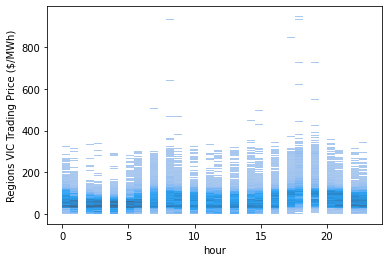

In [60]:
sns.histplot(x=victoria_data['hour'],y=victoria_price['Regions VIC Trading Price ($/MWh)'])
plt.show()